<a href="https://colab.research.google.com/github/songseokbeom/ML_study/blob/master/3_2_ppn_model_sklearn_Iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
# y = np.reshape(iris.target, (1, iris.target.shape[0]))

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1, stratify=y)

In [0]:
scaler = StandardScaler()
scaler.fit(X_train) # train set의 mean과 std만을 사용해서 standardization
X_train_std = scaler.transform(X_train) # fit 된 데이터셋의 mean과 std만큼 이동
X_test_std = scaler.transform(X_test) # fit 된 데이터셋의 mean과 sta만큼 이동

In [33]:
ppn_model = Perceptron(max_iter=40, eta0 = 0.1, tol=1e-3, random_state=1)
ppn_model.fit(X_train_std, Y_train)
y_pred = ppn_model.predict(X_test_std)
print('miss prediction: {}'.format((Y_test != y_pred).sum()))
print('accuracy: {}'.format(accuracy_score(Y_test, y_pred)))
print('accuracy: {}'.format(ppn_model.score(X_test_std, Y_test)))

miss prediction: 1
accuracy: 0.9777777777777777
accuracy: 0.9777777777777777


In [0]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
  
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],
                alpha=0.8, c=colors[idx],
                marker=markers[idx], label=cl,
                edgecolor='black')
  if test_idx:
      X_test, y_test = X[test_idx, :], y[test_idx]
      plt.scatter(X_test[:, 0], X_test[:, 1],
                  c='', edgecolor='black', alpha=1.0,
                  linewidth=1, marker='o',
                  s=100, label='test set')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


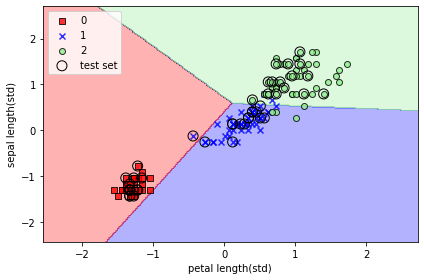

accuracy: 0.9533333333333334


In [42]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined_std = np.hstack((Y_train, Y_test))
plot_decision_regions(X=X_combined_std,
                      y=y_combined_std,
                      classifier=ppn_model,
                      test_idx=range(105, 150))
plt.xlabel('petal length(std)')
plt.ylabel('sepal length(std)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
y_pred = ppn_model.predict(X_combined_std)
print('accuracy: {}'.format(accuracy_score(y_combined_std, y_pred)))